In [ ]:
#Using Iris Dataset

In [2]:
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn import tree
import matplotlib.pyplot as plt

iris = load_iris()
iris_df = pd.DataFrame(data=iris.data, columns=iris.feature_names)
iris_df['target'] = iris.target
iris_df['target'] += 1

# Normalize the feature columns to the range [0, 10]
scaler = MinMaxScaler(feature_range=(0, 10))
iris_df[iris.feature_names] = scaler.fit_transform(iris_df[iris.feature_names])

# Round off the features to their nearest integer
iris_df[iris.feature_names] = iris_df[iris.feature_names].round(0)

# Print the DataFrame
print(iris_df.head(50))


    sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                 2.0               6.0                1.0               0.0   
1                 2.0               4.0                1.0               0.0   
2                 1.0               5.0                1.0               0.0   
3                 1.0               5.0                1.0               0.0   
4                 2.0               7.0                1.0               0.0   
5                 3.0               8.0                1.0               1.0   
6                 1.0               6.0                1.0               1.0   
7                 2.0               6.0                1.0               0.0   
8                 0.0               4.0                1.0               0.0   
9                 2.0               5.0                1.0               0.0   
10                3.0               7.0                1.0               0.0   
11                1.0               6.0 

In [3]:
#printing Accuracy

In [4]:
X = iris_df.iloc[:, :-1].values
y = iris_df['target'].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

clf = tree.DecisionTreeClassifier()
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.9666666666666667


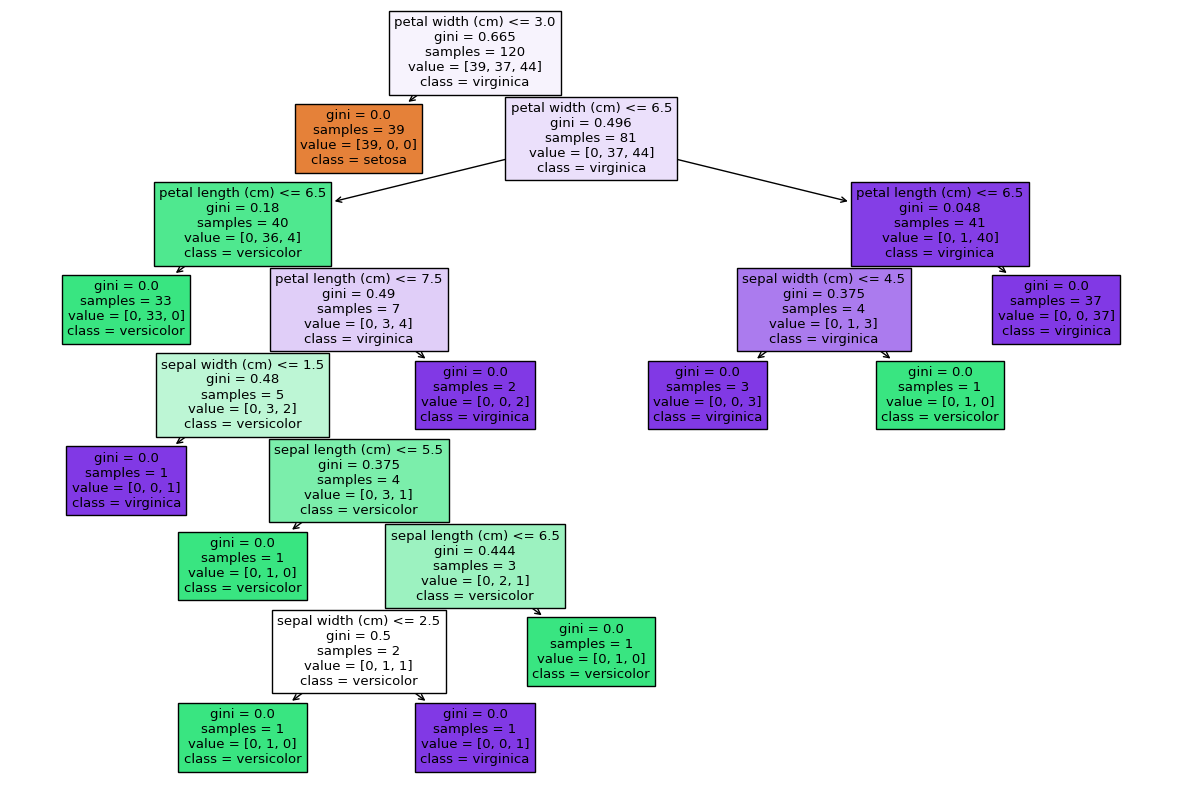

In [5]:
plt.figure(figsize=(15,10))
tree.plot_tree(clf,
               feature_names = iris.feature_names,
               class_names=iris.target_names,
               filled = True)
plt.show()

In [6]:
r = tree.export_text(clf, feature_names=iris.feature_names)
print(r)

|--- petal width (cm) <= 3.00
|   |--- class: 1
|--- petal width (cm) >  3.00
|   |--- petal width (cm) <= 6.50
|   |   |--- petal length (cm) <= 6.50
|   |   |   |--- class: 2
|   |   |--- petal length (cm) >  6.50
|   |   |   |--- petal length (cm) <= 7.50
|   |   |   |   |--- sepal width (cm) <= 1.50
|   |   |   |   |   |--- class: 3
|   |   |   |   |--- sepal width (cm) >  1.50
|   |   |   |   |   |--- sepal length (cm) <= 5.50
|   |   |   |   |   |   |--- class: 2
|   |   |   |   |   |--- sepal length (cm) >  5.50
|   |   |   |   |   |   |--- sepal length (cm) <= 6.50
|   |   |   |   |   |   |   |--- sepal width (cm) <= 2.50
|   |   |   |   |   |   |   |   |--- class: 2
|   |   |   |   |   |   |   |--- sepal width (cm) >  2.50
|   |   |   |   |   |   |   |   |--- class: 3
|   |   |   |   |   |   |--- sepal length (cm) >  6.50
|   |   |   |   |   |   |   |--- class: 2
|   |   |   |--- petal length (cm) >  7.50
|   |   |   |   |--- class: 3
|   |--- petal width (cm) >  6.50
|   |   